In [263]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os

In [264]:
def score(reduc_time, accuracy, train_time, red_w = 200, ac_w = 1, train_w = 20):
    return (accuracy ** ac_w)*(red_w/int(reduc_time + 1) + train_w/int(train_time + 1))

def analyse(path, reduction_weight, accuracy_weight, training_weight):
    df_each = []
    for filename in os.listdir(path):
        f = os.path.join(path, filename)
        if os.path.isfile(f) and ".DS" not in f:
            temp = pd.read_csv(f)
            temp = temp[temp.name.apply(lambda x: x != "name")]
            df_each.append((temp, filename))

    included_cols = ["name", "filename", "original_shape", "transformed_shape", "params", "reduction_time", "accuracy", "train_time", "score_series"]

    out_df = pd.DataFrame(columns=included_cols)
    collected_all_df = pd.DataFrame(columns=included_cols)
    count_all_df = pd.DataFrame(columns=included_cols)

    for res in df_each:
        res_copy = res[0].copy()
        res_copy["filename"] = res[1]
        score_series = res_copy[res_copy.name != "Nothing"][["reduction_time", "train_time", "accuracy"]].apply(lambda x: score(x["reduction_time"], x["accuracy"], reduction_weight, accuracy_weight, training_weight), axis=1)
        res_copy_score = res_copy.copy()
        res_copy_score["score_series"] = score_series
        out_df = pd.concat([out_df, res_copy_score])
        max_ind = res_copy_score.groupby(by=["original_shape"])["score_series"].idxmax()
        collected = res_copy_score.iloc[max_ind][["name", "filename", "original_shape", "transformed_shape", "params", "reduction_time", "accuracy", "train_time", "score_series"]]
        collected_all_df = pd.concat([collected_all_df, collected])

    all = out_df.groupby(by="filename", group_keys=True).apply(lambda x: x[:])
    best = collected_all_df.groupby(["filename", "name"]).count().sort_values(by="original_shape").groupby(level=0).tail(1).sort_values(by="filename")
    count_all_df = collected_all_df.groupby(["filename", "name"]).count()
    return all, best, count_all_df

In [265]:
reduction_weight = 10
accuracy_weight = 10
training_weight = 10

In [266]:
path = "../output/kmeans/"
kmeans_all, kmeans_best, counts = analyse(path, reduction_weight, accuracy_weight, training_weight)

In [267]:
sliced = counts.iloc[:, :1].reset_index(level=["filename", "name"])
sliced.columns = ["filename", "name", "count"]
transpoed = sliced.groupby(by="filename", group_keys=True).apply(lambda x: x.loc[:, ["name", "count"]].pivot_table(values='count', columns='name', aggfunc='first')).fillna(0).reset_index()
transpoed.index = transpoed.loc[:, "filename"]
transpoed = transpoed.loc[:, ["JL transform", "PCA", "extremely sparse JL transform", "sparse JL transform"]]
transpoed

name,JL transform,PCA,extremely sparse JL transform,sparse JL transform
filename,,,,
"1000_0.33_(-100, 100)",2.0,1.0,5.0,1.0
"1000_0.33_(-1000, 1000)",0.0,0.0,5.0,4.0
"1000_0.33_(-500, 500)",1.0,0.0,5.0,3.0
"1000_0.66_(-100, 100)",1.0,1.0,6.0,1.0
"1000_0.66_(-1000, 1000)",2.0,0.0,5.0,2.0
"1000_0.66_(-500, 500)",1.0,1.0,4.0,3.0
"1000_0.99_(-100, 100)",2.0,0.0,4.0,3.0
"1000_0.99_(-1000, 1000)",5.0,1.0,0.0,3.0
"1000_0.99_(-500, 500)",3.0,1.0,3.0,2.0


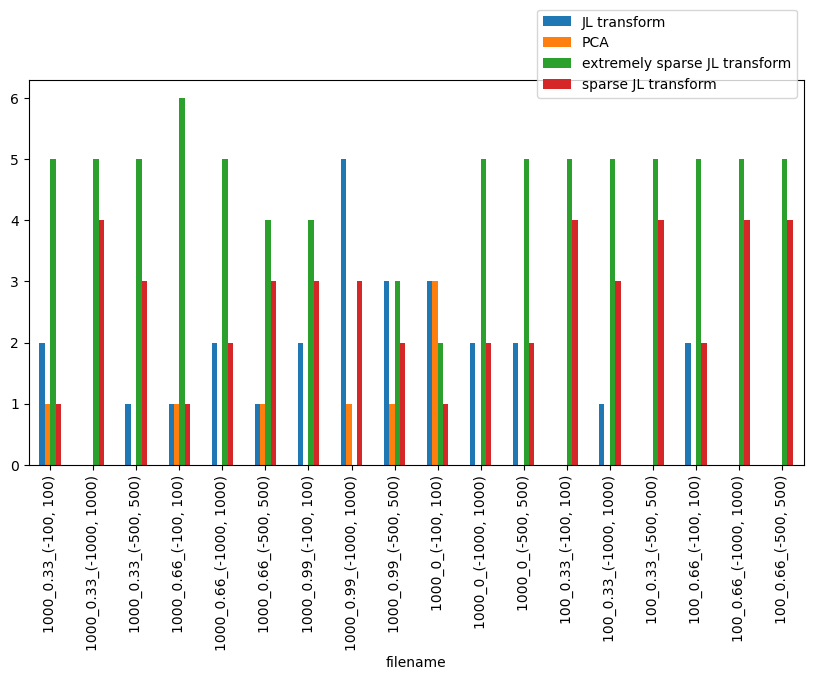

In [268]:
ax = transpoed[:18].plot.bar(figsize=(10, 5))
ax.legend(bbox_to_anchor=(1.0, 1.2))

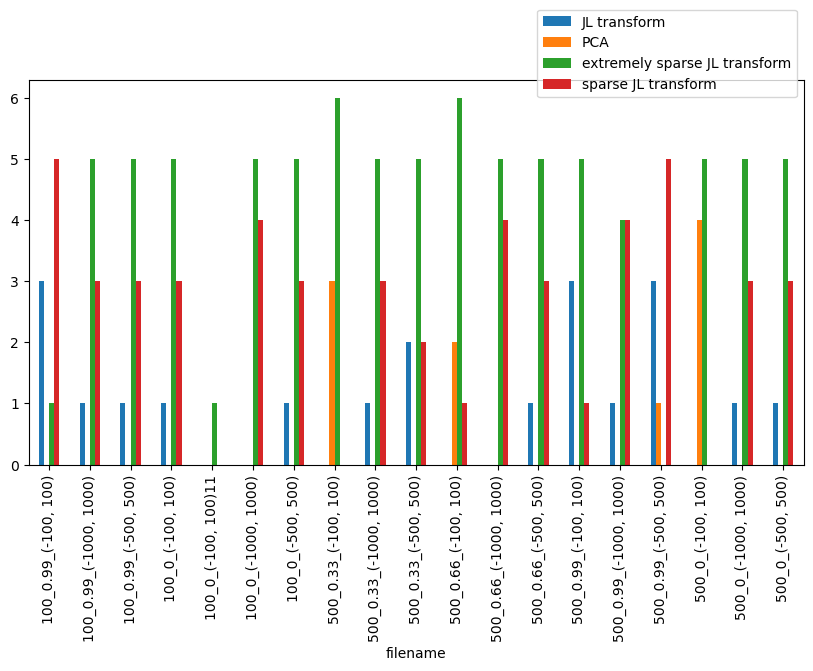

In [269]:
ax = transpoed[18:].plot.bar(figsize=(10, 5))
ax.legend(bbox_to_anchor=(1.0, 1.2))

<Axes: xlabel='filename'>

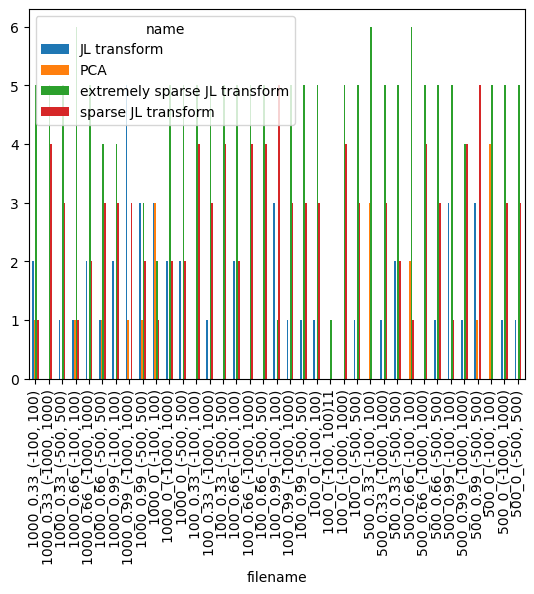

In [270]:
transpoed.plot.bar()

In [271]:
path = "../output/news/"
news_all, news_best, news_count = analyse(path, reduction_weight, accuracy_weight, training_weight)

In [272]:
news_all

name filename  original_shape  \
filename                                                              
2        0   extremely sparse JL transform        2   (6726, 16990)   
         1   extremely sparse JL transform        2   (6726, 16990)   
         2   extremely sparse JL transform        2   (6726, 16990)   
         3   extremely sparse JL transform        2   (6726, 16990)   
         4   extremely sparse JL transform        2   (6726, 16990)   
...                                    ...      ...             ...   
5        21                   JL transform        5  (23183, 40537)   
         22                   JL transform        5  (23183, 40537)   
         23                   JL transform        5  (23183, 40537)   
         24                            PCA        5  (23183, 40537)   
         25                        Nothing        5  (23183, 40537)   

            transformed_shape                                       params  \
filename                                                                     
2        0       (6928, 4029)                     {'ep': 0.05, 'de': 0.05}   
         1       (6928, 3894)                      {'ep': 0.05, 'de': 0.1}   
         2       (6928, 2014)                      {'ep': 0.1, 'de': 0.05}   
         3       (6928, 1947)                       {'ep': 0.1, 'de': 0.1}   
         4        (6928, 402)                      {'ep': 0.5, 'de': 0.05}   
...                       ...                                          ...   
5        21      (23688, 221)                       {'ep': 0.5, 'de': 0.1}   
         22       (23688, 88)                      {'ep': 0.9, 'de': 0.05}   
         23       (23688, 68)                       {'ep': 0.9, 'de': 0.1}   
         24      (23688, 236)  {'n_components': 236, 'svd_solver': 'auto'}   
         25    (23688, 40537)                                           {}   

             reduction_time  accuracy  train_time  score_series  run_num  ...  \
filename                                                                  ...   
2        0         0.437593     1.000    0.906473     11.818182      0.0  ...   
         1         0.423221     0.935    0.715884      6.034854      0.0  ...   
         2         0.408222     0.975    0.563305      9.174805      0.0  ...   
         3         0.411041     1.000    0.475363     11.818182      0.0  ...   
         4         0.408369     0.975    0.544050      9.174805      0.0  ...   
...                     ...       ...         ...           ...      ...  ...   
5        21        3.132158     0.358    0.581430      0.000149      0.0  ...   
         22        2.641303     0.318    0.536496      0.000054      0.0  ...   
         23        2.438814     0.306    0.541322      0.000037      0.0  ...   
         24       60.950643     0.690    0.578181      0.048486      0.0  ...   
         25        0.000038     0.622    7.140457           NaN      0.0  ...   

             original_std_max  original_std_min  original_sparsity  \
filename                                                             
2        0           0.007671          0.007665           0.998996   
         1           0.007671          0.007665           0.998996   
         2           0.007671          0.007665           0.998996   
         3           0.007671          0.007665           0.998996   
         4           0.007671          0.007665           0.998996   
...                       ...               ...                ...   
5        21          0.004967          0.004962           0.999618   
         22          0.004967          0.004962           0.999618   
         23          0.004967          0.004962           0.999618   
         24          0.004967          0.004962           0.999618   
         25          0.004967          0.004962           0.999618   

             transformed_std_sum  transformed_std_mean  \
filename                                                 
2        0        

In [273]:
news_best

,,original_shape,transformed_shape,params,reduction_time,accuracy,train_time,score_series
filename,name,,,,,,,
2,extremely sparse JL transform,1,1,1,1,1,1,1
3,extremely sparse JL transform,1,1,1,1,1,1,1
5,extremely sparse JL transform,1,1,1,1,1,1,1


In [274]:
path = "../output/lin_reg/"

In [275]:
reg_all, reg_best, reg_count = analyse(path, reduction_weight, accuracy_weight, training_weight)

In [276]:
reg_all.loc["1000_0"]

,name,filename,original_shape,transformed_shape,params,reduction_time,accuracy,train_time,score_series,run_num,...,original_std_max,original_std_min,original_sparsity,transformed_std_sum,transformed_std_mean,transformed_std_median,transformed_std_max,transformed_std_min,transformed_sparsity,characteristics
0,extremely sparse JL transform,1000_0,"(800, 999)","(1000, 2322)","{'ep': 0.05, 'de': 0.05}",0.081309,0.991170,0.634847,1.081515e+01,0.0,...,153814.246660,53734.561934,0.0,6.185990e+07,6.185990e+04,6.009268e+04,8.898140e+04,33624.755765,0.0,"{'n': 1000, 'd': 1000, 'x_range': 10000, 'coef..."
1,extremely sparse JL transform,1000_0,"(800, 999)","(1000, 2226)","{'ep': 0.05, 'de': 0.1}",0.018250,0.973709,0.482785,9.054006e+00,0.0,...,153814.246660,53734.561934,0.0,5.224789e+07,5.224789e+04,5.228416e+04,6.815595e+04,33609.354230,0.0,"{'n': 1000, 'd': 1000, 'x_range': 10000, 'coef..."
2,extremely sparse JL transform,1000_0,"(800, 999)","(1000, 1161)","{'ep': 0.1, 'de': 0.05}",0.034796,0.766579,0.354266,8.281655e-01,0.0,...,153814.246660,53734.561934,0.0,1.395197e+08,1.395197e+05,1.343591e+05,2.323182e+05,50924.808713,0.0,"{'n': 1000, 'd': 1000, 'x_range': 10000, 'coef..."
3,extremely sparse JL transform,1000_0,"(800, 999)","(1000, 1113)","{'ep': 0.1, 'de': 0.1}",0.011325,0.181235,0.293531,4.518333e-07,0.0,...,153814.246660,53734.561934,0.0,8.852732e+07,8.852732e+04,8.607918e+04,1.330149e+05,48303.996614,0.0,"{'n': 1000, 'd': 1000, 'x_range': 10000, 'coef..."
4,extremely sparse JL transform,1000_0,"(800, 999)","(1000, 232)","{'ep': 0.5, 'de': 0.05}",0.007037,0.655796,0.025002,1.738758e-01,0.0,...,153814.246660,53734.561934,0.0,3.396663e+08,3.396663e+05,3.310628e+05,5.922629e+05,75558.109383,0.0,"{'n': 1000, 'd': 1000, 'x_range': 10000, 'coef..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,JL transform,1000_0,"(16000, 9999)","(20000, 221)","{'ep': 0.5, 'de': 0.1}",1.607363,0.877256,0.218929,1.840488e+00,0.0,...,224458.311993,99529.900779,0.0,2.134304e+10,1.067152e+06,1.067538e+06,1.530444e+06,616712.864739,0.0,"{'n': 20000, 'd': 10000, 'x_range': 10000, 'co..."
204,JL transform,1000_0,"(16000, 9999)","(20000, 88)","{'ep': 0.9, 'de': 0.05}",1.630216,0.736913,0.144630,3.219803e-01,0.0,...,224458.311993,99529.900779,0.0,3.482116e+10,1.741058e+06,1.734343e+06,2.665841e+06,968958.014219,0.0,"{'n': 20000, 'd': 10000, 'x_range': 10000, 'co..."
205,JL transform,1000_0,"(16000, 9999)","(20000, 68)","{'ep': 0.9, 'de': 0.1}",0.816336,0.717685,0.079260,4.284379e-01,0.0,...,224458.311993,99529.900779,0.0,3.831971e+10,1.915986e+06,1.909033e+06,3.023940e+06,981091.407398,0.0,"{'n': 20000, 'd': 10000, 'x_range': 10000, 'co..."
206,PCA,1000_0,"(16000, 9999)","(20000, 200)","{'n_components': 200, 'svd_solver': 'auto'}",36.636848,0.935635,0.316000,1.073712e+00,0.0,...,224458.311993,99529.900779,0.0,2.213328e+10,1.106664e+06,1.108816e+06,1.569929e+06,656056.444796,0.0,"{'n': 20000, 'd': 10000, 'x_range': 10000, 'co..."


In [277]:
reg_best

,,original_shape,transformed_shape,params,reduction_time,accuracy,train_time,score_series
filename,name,,,,,,,
1000_0,extremely sparse JL transform,4,4,4,4,4,4,4
1000_0.1,extremely sparse JL transform,5,5,5,5,5,5,5
1000_0.3,extremely sparse JL transform,4,4,4,4,4,4,4
1000_0.5,extremely sparse JL transform,5,5,5,5,5,5,5
1000_0.9,extremely sparse JL transform,5,5,5,5,5,5,5
100_0,extremely sparse JL transform,4,4,4,4,4,4,4
100_0.1,extremely sparse JL transform,4,4,4,4,4,4,4
100_0.3,extremely sparse JL transform,5,5,5,5,5,5,5
100_0.5,extremely sparse JL transform,5,5,5,5,5,5,5


Below is for visualizing.

In [278]:
sliced = reg_count.iloc[:, :1].reset_index(level=["filename", "name"])
sliced.columns = ["filename", "name", "count"]
transpoed = sliced.groupby(by="filename", group_keys=True).apply(lambda x: x.loc[:, ["name", "count"]].pivot_table(values='count', columns='name', aggfunc='first')).fillna(0).reset_index()
transpoed.index = transpoed.loc[:, "filename"]
transpoed = transpoed.loc[:, ["JL transform", "extremely sparse JL transform", "sparse JL transform"]]
transpoed

name,JL transform,extremely sparse JL transform,sparse JL transform
filename,,,
1000_0,3,4,1.0
1000_0.1,3,5,0.0
1000_0.3,3,4,1.0
1000_0.5,3,5,0.0
1000_0.9,1,5,2.0
100_0,1,4,3.0
100_0.1,3,4,1.0
100_0.3,1,5,2.0
100_0.5,1,5,2.0


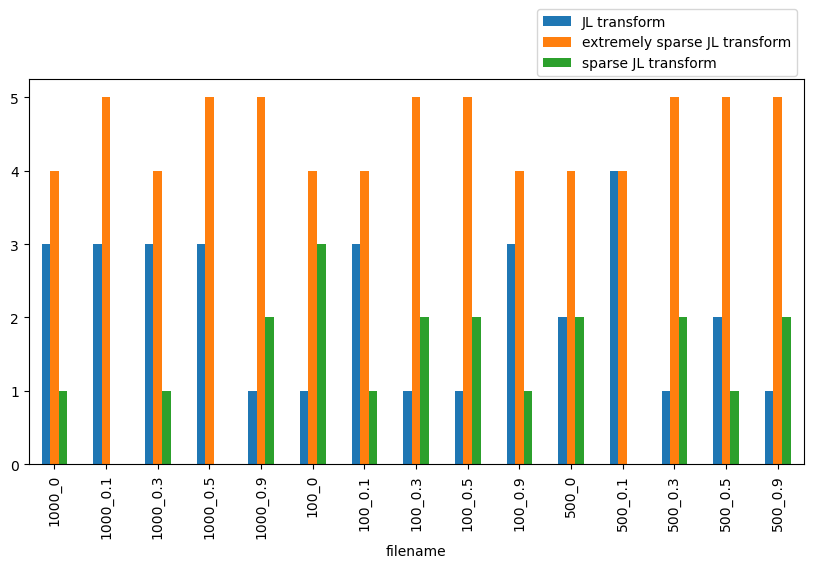

In [279]:
ax = transpoed.plot.bar(figsize=(10, 5))
ax.legend(bbox_to_anchor=(1.0, 1.2))